# 2D - DCT & PCA: MNIST Dataset
In this module, we will look at the MNIST dataset and attempt to use a 2D Discrete Cosine Trasnform, as well as PCA to reduce the dataset into a much smaller set of features. 


## Import the necessary packages

In [2]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt 
import scipy.fft as scpfft
import scipy.stats as scpstats
import sklearn as skl
import sklearn.decomposition as skdec


## Read in the data
Solution: 
- This can be easily accomplished using the pandas function read_csv
- The following lines will read in the data from the csv and assign it to a variable called train_data
- The following code will then also display the first 5 lines of train_data to ensure corrrect reading, by calling train_data.head()

In [3]:
train_data = pd.read_csv('Data/train.csv')          # Read in the Training Data
train_data.head()                                   # Display the Top 5 rows of the read-in Data as a sanity check

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Explore and reshape the data.

Solution: 
- This can be easily accomplished by calling the pandas "reshape" function on the values of a given row (not counting the label)
- We will first attempt to run this for one image only, to check that the resulting nested array is viable for plotting. 
- To do so, we will initially extract a singular row from the training data, drop the "Label" column using the pandas function .drop()
- Once the "label" columnn has been dropped, we call pandas.reshape() to broadcast the 784 pixel values into a 28x28 matrix (using np.array for computational ease)
- We will then display the resulting matrix and print its shape to ensure the reshaping has yielded the correct result. 

Once we have checked that our reshaping function works as intended, we will be confident in using this within an iterative loop to perform the same function across a given list of indices.

In [5]:
extraction_trial = train_data.loc[0].drop(['label'])                    # Remove "Label" Column
matrix_trial = np.array(extraction_trial.values.reshape([28,28]))       # Reshape values into a 28x28 numpy array
print(f' The resulting array has shape: {matrix_trial.shape}')          # Check the Shape                                                         

 The resulting array has shape: (28, 28)


As a further sanity check, we can call Matplotlib's matshow function to ensure that the data was broadcasted without any transposes or rotations. 
In Part C, we will use this function within an iterative loop to generate the images for each of the numbers in our desired indices. 

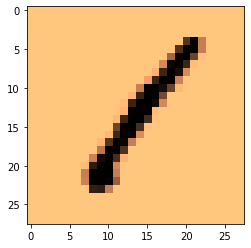

In [6]:
plt.imshow(matrix_trial, cmap = 'copper_r')           # Create a visualization for our Trial Matrix

### Define the 2D DCT Function
We will perform the 2-dimensional Discrete Cosine Transform by leveraging scipy's fft pack and their built-in DCT function. This will be done by taking the current steps:
- We will define a function that calls scipy's DCT function twice within a given input matrix "A", and which will output the resulting matrix of DCT coefficients. 
    - This is necessary as scipy's original DCT function is not 2-dimensional, but only operates upon one dimension.
    - Note: There seem to be other packages capable of directly performing 2D-DCT, but these have not been imported for use in this project. 
- After we have defined this function, we will perform a sanity check in order to determine whether the outputted results are as desired, by applying the 2D DCT on a trial matrix. 
- We will then search through the training data to find 10 image representations of each numerical value, and save their indices to a new index array, using pandas' localization functionalities. 
- Once we have these matrices, we can perform a 2D DCT on each of the 100 resulting matrices, by iterating with a for-loop. 


Here we define the 2D DCT Function leveraging Scipy's FFT pack and its DCT built-in function. Please note that we call the function on itself twice. An alternative to this would be using the newly implemented "dctn" function. However, for the sake of showing the underlyign structure of the 2D-DCT

In [7]:
def dct2d(a):
    return scpfft.dct(scpfft.dct(a.T, norm='ortho').T, norm='ortho')

### Run on Sample Array
Here we run the 2D-DCT function on a sample matrix, in order to check the output. 

The 2D-DCT Output has shape: (28, 28)


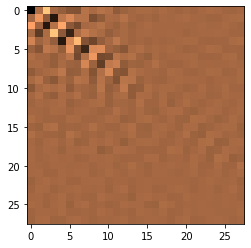

In [8]:
dct_trial = dct2d(matrix_trial)                                     # Call the Function
print(f'The 2D-DCT Output has shape: {np.shape(dct_trial)}')        # Check the shape
plt.imshow(dct_trial, cmap = 'copper_r')                                               # Check the resulting matrix by displaying

### Extract the Indices for the first 10 Representation of Each Numerical Value 
Here we leverage pandas' convenient indexing functionality to find the indices of the first representation of each numerical value, by using the "Label" column as an identifier. 
We then concatenate each of the resulting representative indices into an index array which will hold the indices of all rows of interest within the data. 

In [9]:
# Extract the first ten Indices for Each Numerical Representation of Interest 
ind_0  = np.array(train_data[train_data['label'] == 0].index)[:10]
ind_1  = np.array(train_data[train_data['label'] == 1].index)[:10]
ind_2  = np.array(train_data[train_data['label'] == 2].index)[:10]
ind_3  = np.array(train_data[train_data['label'] == 3].index)[:10]
ind_4  = np.array(train_data[train_data['label'] == 4].index)[:10]
ind_5  = np.array(train_data[train_data['label'] == 5].index)[:10]
ind_6  = np.array(train_data[train_data['label'] == 6].index)[:10]
ind_7  = np.array(train_data[train_data['label'] == 7].index)[:10]
ind_8  = np.array(train_data[train_data['label'] == 8].index)[:10]
ind_9  = np.array(train_data[train_data['label'] == 9].index)[:10]

#Concatenate them and print the resulting index array, in order to ensure the indices are accurate. 
index_array = np.concatenate((ind_0,ind_1,ind_2,ind_3,ind_4,ind_5,ind_6,ind_7,ind_8,ind_9))
index_array

array([  1,   4,   5,  17,  23,  54,  63,  69,  98, 108,   0,   2,  12,
        15,  35,  37,  38,  41,  52,  59,  16,  22,  24,  34,  44,  55,
        56,  73,  84,  94,   7,   9,  13,  14,  25,  36,  46,  57,  65,
        70,   3,  32,  39,  42,  43,  49,  66,  75,  78,  81,   8,  19,
        51,  62,  80,  99, 107, 119, 125, 128,  21,  26,  45,  64,  72,
        74,  89,  91,  93, 109,   6,  18,  29,  47,  48,  50,  76, 102,
       103, 116,  10,  20,  30,  67,  82,  87, 105, 106, 131, 135,  11,
        27,  28,  31,  33,  40,  53,  58,  71,  83], dtype=int64)

### Extract the DCT Coefficient Matrices for all 100 Images
Here we will create a for-loop, call the 2D-DCT function defined above to create a 2D-DCT Coefficients Matrix for each of the Indices defined above. 
We will then check the first matrix of the output to make sure the data is of correct shape and logic. 

The output has shape (100, 28, 28)
A single DCT matrix has shape(28, 28)


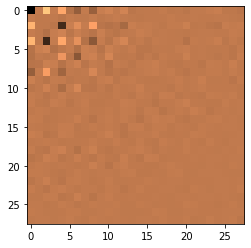

In [10]:
dct_mats = []                                                   # Initialize Output Array

# Perform the methodology described above, iterating through target indices
for index in index_array:
    current_array = train_data.loc[index]
    temp_array = current_array.drop(['label'])
    temp_matrix = temp_array.values.reshape([28,28])
    temp_dct_data = dct2d(temp_matrix)
    dct_mats.append(temp_dct_data)

print(f'The output has shape {np.shape(dct_mats)}')             # Check DataSet Shape
print(f'A single DCT matrix has shape{np.shape(dct_mats[0])}')  # Check Single DCT Matrix Shape
plt.imshow(dct_mats[0], cmap = 'copper_r')                                         # Perform Visual Sanity Check for "0" representation

## Extract the vertical, horizontal and diagonal coefficients from the transform.

In order to extract the vertical, horizontal and diagonal coefficients of the transform, we will perform the following steps:
- Define a 28x28 Vertical Transform Mask
- Define a 28x28 Horizontal Transform Mask
- Define a 28x28 Diagonal Transform Mask
- From each of the three types of masks (corresponding to each type of transform), extract the indices of the features each of transform will choose to extract. 
- Once these have been retained, we will initialize a for-loop to perform the same DCT operations as that above, and proceed to extract each of the horizontal, vertical and diagonal transform from each of the DCT coefficient matrices. 

This methodology will yield three separate sets of DCT Coefficients: Horizontal, Vertical, and Diagonal. Each of these will contain the relevant coefficients for each of the 100 matrices transformed.

### Create the Diagonal, Vertical and Horizontal Masks
Here, we create matrices of 1's and 0's that will act as masks for our DCT matrix. These have been adapted from Prof. Rodriguez's own Matlab code. 

In [11]:
v_mask =   np.array(
            [[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

h_mask =    np.array(
            [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

d_mask =   np.array(
            [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
            [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])


### Extract the Indices
Here, we find the indices we will choose to keep for the Diagonal, Horizontal and Vertical transforms respectively. 

In [12]:
# Extract Indices for Vertical Mask
vectorized_v_mask = np.matrix.flatten(v_mask)           
v_indices = []                                          
for i in range(len(vectorized_v_mask)):
    if vectorized_v_mask[i] == 1:
        v_indices.append(i)

# Extract Indices for Horizontal Mask
vectorized_h_mask = np.matrix.flatten(h_mask)
h_indices = []
for i in range(len(vectorized_h_mask)):
    if vectorized_h_mask[i] == 1:
        h_indices.append(i)

# Extract Indices for Diagonal Mask
vectorized_d_mask = np.matrix.flatten(d_mask)
d_indices = []
for i in range(len(vectorized_d_mask)):
    if vectorized_d_mask[i] == 1:
        d_indices.append(i)


### Extract Horizontal, Vertical and Diagonal Coefficients from DCT Transform
We call the same for-loop as we called in Question 3, Part A. Here, however, we apply the Vertical, Diagonal and Horizontal masks to the DCT transform of each image, and save it to three separate arrays, in order to have a vertical, diagonal and horizontal DCT transform of each image. This will later allows us to perform Principal Components Analysis on each of the three datasets. We then check the shape and tendency of the data to ensure correctness. 

In [13]:
# Initialize Vertical, Horizontal, and Diagonal Data Sets
V_Data = []
H_Data = []
D_Data = []

for index in index_array:                                                       
    current_array = train_data.loc[index]                                               # Extract relevant Matrix from Data
    temp_array = current_array.drop(['label'])                                          # Drop label column
    temp_matrix = temp_array.values.reshape([28,28])                                    # Reshape to 28x28 matrix
    temp_dct_data = dct2d(temp_matrix)                                                  # Perfrom 2D DCT Transform of current matrix
    vectorized_v_dct = np.matrix.flatten(np.multiply(temp_dct_data, v_mask))            # Apply Vertical Mask to 2D DCT Transform 
    vectorized_h_dct = np.matrix.flatten(np.multiply(temp_dct_data, h_mask))            # Apply Horizontal Mask to 2D DCT Transform 
    vectorized_d_dct = np.matrix.flatten(np.multiply(temp_dct_data, d_mask))            # Apply Diagonal Mask to 2D DCT Transform 
    V_Data.append(vectorized_v_dct[v_indices])                                          # Append Vertical DCT Coefficients 
    D_Data.append(vectorized_d_dct[d_indices])                                          # Append Diagonal DCT Coefficients
    H_Data.append(vectorized_h_dct[h_indices])                                          # Append Horizontal DCT Coefficients 

# Convert resultant datasets to numpy arrays for ease of computation
V_Data_arr = np.array(V_Data)
H_Data_arr = np.array(H_Data)
D_Data_arr = np.array(D_Data)

# Check the Shape of Each Transform
print(np.shape(V_Data_arr))
print(np.shape(H_Data_arr))
print(np.shape(D_Data_arr))

(100, 224)
(100, 224)
(100, 335)


### Diagonal Data PCA | Sklearn Methodology
Here, we leverage sklearn's decomposition package and its built-in PCA function in order to perform PCA for each of the three types of transforms, and extract:
- The transformed data
- The eigenvectors
- The singular eigenvalues
- The total explained variance

This will create a number of components equal to the lower value between the number of samples and the number of features. In our case, given that our sample size has n = 100, it will be 100. 

In [14]:
D_Data_PCA = skdec.PCA()                                        # Initialize PCA with n = 20
D_Data_Transform = D_Data_PCA.fit_transform(D_Data_arr)         # Apply to Diagonal Data Set
D_Data_Evecs = D_Data_PCA.components_                           # Extract Eigenvectors
D_Data_Evals = D_Data_PCA.singular_values_                      # Extract Eigenvalues
D_Data_Explained = D_Data_PCA.explained_variance_ratio_         # Extract Explained Variance

### Horizontal Data PCA | Sklearn Methodology
Here, we leverage sklearn's decomposition package and its built-in PCA function in order to perform PCA for each of the three types of transforms, and extract:
- The transformed data
- The eigenvectors
- The singular eigenvalues
- The total explained variance

This will create a number of components equal to the lower value between the number of samples and the number of features. In our case, given that our sample size has n = 100, it will be 100. 

In [15]:
H_Data_PCA = skdec.PCA()                                     # Initialize PCA with n = 20
H_Data_Transform = H_Data_PCA.fit_transform(H_Data_arr)      # Apply to Diagonal Data Set
H_Data_Evecs = H_Data_PCA.components_                        # Extract eigenvectors
H_Data_Evals = H_Data_PCA.singular_values_                   # Extract eigenvalues
H_Data_Explained = H_Data_PCA.explained_variance_ratio_      # Extract explained variance


### Vertical Data PCA | Sklearn Methodology
Here, we leverage sklearn's decomposition package and its built-in PCA function in order to perform PCA for each of the three types of transforms, and extract:
- The transformed data
- The eigenvectors
- The singular eigenvalues
- The total explained variance

This will create a number of components equal to the lower value between the number of samples and the number of features. In our case, given that our sample size has n = 100, it will be 100. 

In [16]:
V_Data_PCA = skdec.PCA()                                     # Initialize PCA with n = 20
V_Data_Transform = V_Data_PCA.fit_transform(V_Data_arr)      # Apply to Diagonal Data Set
V_Data_Evecs = V_Data_PCA.components_                        # Extract eigenvectors
V_Data_Evals = V_Data_PCA.singular_values_                   # Extract eigenvalues
V_Data_Explained = V_Data_PCA.explained_variance_ratio_      # Extract explained variance


### Explained Variance Target Approach: 90%
Here, we seek to determine, for each of the transfornms, how many principal components we must keep in order to explain 90% of the data's variance. To do this, we will take the following steps:
- Initialize a for-loop that iterates through the explained_variance variable until its sum is greater than or equal to 0.9.
- We then extract the iterative loop number, allowing us to define how many principal components to keep. 
- We then perform PCA using this value as the number of total components to keep. 

### Diagonal Space | 90% Variance Explained:
Here we perform the operation described above on the diagonal set, retaining the amount of components that explain 90% of the variance.

In [17]:
# Find out how many components it takes to explain 90% of the variance.
n_components_90_diag = 0
for i in range(len(D_Data_Explained)):
    if np.sum(D_Data_Explained[0:i]) <= .9:
        n_components_90_diag = i + 1

print(f"In the diagonal set, {n_components_90_diag} components will explain 90% of the variance.")

# Now we can run PCA, keeping only the amount of components necessary to explain 90% of variance.
D_Data_PCA = skdec.PCA(n_components_90_diag)                # Initialize PCA with desired n
D_Data_Transform = D_Data_PCA.fit_transform(D_Data_arr)     # Apply to Diagonal Data Set


In the diagonal set, 30 components will explain 90% of the variance.


### Horizontal Space | 90% Variance Explained:
Here we perform the operation described above on the horizontal set, retaining the amount of components that explain 90% of the variance.

In [18]:
# Find out how many components it takes to explain 90% of the variance.
n_components_90_hor = 0
for i in range(len(H_Data_Explained)):
    if np.sum(H_Data_Explained[0:i]) <= .9:
        n_components_90_hor = i + 1

print(f"In the horizontal set, {n_components_90_hor} components will explain 90% of the variance.")

# Now we can run PCA, keeping only the amount of components necessary to explain 90% of variance.
H_Data_PCA = skdec.PCA(n_components_90_hor)                 # Initialize PCA with desired n
H_Data_Transform = H_Data_PCA.fit_transform(H_Data_arr)     # Apply to Diagonal Data Set

In the horizontal set, 25 components will explain 90% of the variance.


### Vertical Space | 90% Variance Explained:
Here we perform the operation described above on the vertical set, retaining the amount of components that explain 90% of the variance.

In [19]:
# Find out how many components it takes to explain 90% of the variance.
n_components_90_vert = 0
for i in range(len(V_Data_Explained)):
    if np.sum(V_Data_Explained[0:i]) <= .9:
        n_components_90_vert = i + 1

print(f"In the vertical set, {n_components_90_vert} components will explain 90% of the variance.")

# Now we can run PCA, keeping only the amount of components necessary to explain 90% of variance.
V_Data_PCA = skdec.PCA(n_components_90_vert)                 # Initialize PCA with desired n
V_Data_Transform = V_Data_PCA.fit_transform(V_Data_arr)      # Apply to Diagonal Data Set

In the vertical set, 25 components will explain 90% of the variance.


## Save the new data in a file of your choice, *.txt, *.csv, etc
Here, we will save our output data to a new csv file! This will take the following steps:
- Convert the transformed data to a pandas DataFrame, for ease of exportation
- Leverage pandas' .to_csv() function to save the outputs to our current directory

In [ ]:
# Diagonal Set
D_Data_Transform_df = pd.DataFrame(D_Data_Transform)
D_Data_Transform_df.to_csv("Transformed_Matrices_Diagonal.csv")

# Vertical Set
V_Data_Transform_df = pd.DataFrame(V_Data_Transform)
V_Data_Transform_df.to_csv("Transformed_Matrices_Vertical.csv")

# Horizontal Set
H_Data_Transform_df = pd.DataFrame(H_Data_Transform)
H_Data_Transform_df.to_csv("Transformed_Matrices_Horizontal.csv")